In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pylab as plt
import seaborn as sns
from sqlalchemy import create_engine
%matplotlib inline



In [2]:
biz = pd.read_csv('biz_products.csv')
normal = pd.read_csv('normal_products.csv')

In [88]:
q = '''
SELECT tp.pid, 
       tp.how_long, 
       tp.interest, 
       Datediff(Max(pup.ad_date), Min(pup.ad_date)) AS num_days, 
       Min(pup.ad_date)                             AS first_day, 
       Max(pup.ad_date)                             AS last_day, 
       Sum(pup.pay_free)                            AS pay_free, 
       Sum(pup.pay_point)                           AS pay_point, 
       Sum(pup.pay_sum)                             AS pay_sum, 
       Sum(pup.stat_click)                          AS stat_click, 
       Sum(pup.stat_view)                           AS stat_view 
FROM   ad_power_up pu 
       JOIN (SELECT p.id                           AS pid, 
                    Datediff(now(), p.create_date) AS how_long, 
                    pe.interest 
             FROM   product_info p 
                    JOIN product_ext pe 
                      ON p.id = pe.pid 
             WHERE  Datediff(now(), p.create_date) between 14 and 60
                    AND p.status = 0 
                    AND pe.interest >= 1000) tp 
         ON tp.pid = pu.pid 
       JOIN ad_power_up_point pup 
         ON pu.pu_id = pup.pu_id 
WHERE  pup.status <= 2 
GROUP  BY tp.pid
'''
pu = pd.read_sql(q, con=mysql)

In [89]:
change = ['pid', 'how_long']
for i in pu.columns[2:]:
    change.append('pu_'+i)
pu.columns = change

In [104]:
pu.columns = ['pid', 'how_long', 'pu_interest', 'pu_num_days', 'pu_first_day', 'pu_last_day', 'pu_pay_free', 'pu_pay_point', 'pu_pay_sum', 'pu_stat_click', 'pu_stat_view']

In [105]:
pu.to_csv('selling_pu.csv', index=False)

In [95]:
q = '''
SELECT tp.pid, 
       tp.how_long, 
       tp.interest, 
       Datediff(Max(susp.ad_date), Min(susp.ad_date)) AS num_days, 
       Min(susp.ad_date)                              AS first_day, 
       Max(susp.ad_date)                              AS last_day, 
       Sum(susp.pay_free)                             AS pay_free, 
       Sum(susp.pay_point)                            AS pay_point, 
       Sum(susp.pay_sum)                              AS pay_sum, 
       Sum(sasus.cnt_click)                           AS stat_click, 
       Sum(sasus.cnt_view)                            AS stat_view 
FROM   ad_super_up_shop sus 
       JOIN ad_super_up_shop_point susp 
         ON susp.sus_id = sus.sus_id 
       JOIN stat_ad_super_up_shop sasus 
         ON sasus.sus_id = sus.sus_id 
       JOIN (SELECT p.id                           AS pid, 
                    Datediff(Now(), p.create_date) AS how_long, 
                    pe.interest 
             FROM   product_info p 
                    JOIN product_ext pe 
                      ON p.id = pe.pid 
             WHERE  Datediff(Now(), p.create_date) between 14 and 60 
                    AND p.status = 0 
                    AND pe.interest >= 1000) tp 
         ON tp.pid = sasus.pid 
WHERE  sus.status <= 2 
GROUP  BY tp.pid 
'''
sus = pd.read_sql(q, con=mysql)

In [96]:
sus

,pid,how_long,interest,num_days,first_day,last_day,pay_free,pay_point,pay_sum,stat_click,stat_view
0,117836912,60,1151,63,2020-03-01,2020-05-03,5600.0,876000.0,881600.0,3129.0,2138.0
1,117843883,60,5866,63,2020-03-01,2020-05-03,19600.0,985900.0,1005500.0,35304.0,624.0
2,117846418,60,1143,18,2020-02-23,2020-03-12,0.0,731600.0,731600.0,5953.0,5724.0
3,117846762,60,1024,18,2020-02-23,2020-03-12,0.0,731600.0,731600.0,5014.0,5403.0
4,117846826,60,1963,18,2020-02-23,2020-03-12,0.0,731600.0,731600.0,9371.0,5123.0
...,...,...,...,...,...,...,...,...,...,...,...
1396,121716672,14,1114,9,2020-04-20,2020-04-29,0.0,0.0,0.0,2450.0,210.0
1397,121726988,14,1450,29,2020-04-05,2020-05-04,0.0,518000.0,518000.0,48150.0,9870.0
1398,121744019,14,1580,39,2020-03-19,2020-04-27,312900.0,100.0,313000.0,11010.0,960.0
1399,121765643,14,3240,14,2020-04-11,2020-04-25,0.0,1903440.0,1903440.0,7776.0,2304.0


In [97]:
change = ['pid', 'how_long']
for i in sus.columns[2:]:
    change.append('sus_'+i)
sus.columns = change

In [103]:
sus.to_csv('selling_sus.csv', index=False)

In [99]:
q = '''
SELECT tp.pid, 
       tp.how_long, 
       tp.interest, 
       Datediff(Max(sup.end_at), Min(sup.start_at)) AS num_days, 
       Min(sup.start_at)                            AS first_day, 
       Max(sup.end_at)                              AS last_day, 
       Sum(sup.pay_free)                            AS pay_free, 
       Sum(sup.pay_point)                           AS pay_point, 
       Sum(sup.pay_sum)                             AS pay_sum, 
       Sum(sasu.cnt_click)                          AS stat_click, 
       Sum(sasu.cnt_view)                           AS stat_view 
FROM   ad_super_up su 
       JOIN (SELECT p.id                           AS pid, 
                    Datediff(Now(), p.create_date) AS how_long, 
                    pe.interest 
             FROM   product_info p 
                    JOIN product_ext pe 
                      ON p.id = pe.pid 
             WHERE  Datediff(Now(), p.create_date) between 14 and 60 
                    AND p.status = 0 
                    AND pe.interest >= 1000) tp 
         ON tp.pid = su.pid 
       JOIN ad_super_up_point sup 
         ON su.suid = sup.suid 
       JOIN stat_ad_super_up sasu 
         ON sasu.suid = su.suid 
WHERE  su.status <= 2 
GROUP  BY tp.pid 
'''
su = pd.read_sql(q, con=mysql)

In [100]:
change = ['pid', 'how_long']
for i in su.columns[2:]:
    change.append('su_'+i)
su.columns = change

In [101]:
su

,pid,how_long,su_interest,su_num_days,su_first_day,su_last_day,su_pay_free,su_pay_point,su_pay_sum,su_stat_click,su_stat_view
0,117838249,60,2005,60,2020-03-24 12:46:18,2020-05-23 12:46:17,0.0,4348260.0,4348260.0,111840.0,54180.0
1,117838492,60,1360,7,2020-03-04 17:40:08,2020-03-11 17:40:07,0.0,0.0,0.0,1932.0,19194.0
2,117839212,60,2337,60,2020-03-15 03:10:25,2020-05-14 21:59:04,0.0,2601900.0,2601900.0,59370.0,35700.0
3,117843883,60,5866,53,2020-02-28 18:08:08,2020-04-21 10:12:10,200.0,829174.0,829374.0,12424.0,60037.0
4,117845710,60,2011,18,2020-03-07 17:48:37,2020-03-25 09:34:10,2940.0,8820.0,11760.0,183.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...
1276,121768970,14,3560,23,2020-04-03 21:59:30,2020-04-26 01:03:49,0.0,360297.0,360297.0,49657.0,24958.0
1277,121781245,14,1051,30,2020-04-09 23:08:52,2020-05-09 23:08:51,0.0,600600.0,600600.0,35460.0,89220.0
1278,121786297,14,1310,10,2020-04-12 10:56:08,2020-04-22 23:50:15,0.0,15330.0,15330.0,1109.0,369.0
1279,121786317,14,1005,10,2020-04-12 10:56:08,2020-04-22 23:30:22,0.0,15330.0,15330.0,943.0,291.0


In [102]:
su.to_csv('selling_su.csv', index=False)

In [109]:
q = '''
SELECT tp.pid, 
       tp.how_long, 
       tp.interest, 
       Datediff(Max(td.ad_date), Min(td.ad_date)) AS num_days, 
       Min(td.ad_date)                            AS first_day, 
       Max(td.ad_date)                            AS last_day, 
       Sum(td.pay_free)                           AS pay_free, 
       Sum(td.pay_point)                          AS pay_point, 
       Sum(td.pay_sum)                            AS pay_sum 
FROM   ad_today_deal td 
       JOIN (SELECT p.id                           AS pid, 
                    Datediff(Now(), p.create_date) AS how_long, 
                    pe.interest 
             FROM   product_info p 
                    JOIN product_ext pe 
                      ON p.id = pe.pid 
             WHERE  Datediff(Now(), p.create_date) BETWEEN 14 AND 60 
                    AND p.status = 0 
                    AND pe.interest >= 1000) tp 
         ON tp.pid = td.pid 
WHERE  td.status <= 2 
GROUP  BY tp.pid 
'''
tp = pd.read_sql(q, con=mysql)

In [110]:
change = ['pid', 'how_long']
for i in tp.columns[2:]:
    change.append('tp_'+i)
tp.columns = change

In [111]:
print(len(tp))
tp.to_csv('selling_tp.csv', index=False)

112


In [112]:
q = '''
SELECT tp.pid, 
       tp.how_long, 
       tp.interest, 
       Datediff(Max(tdp.ad_date), Min(tdp.ad_date)) AS num_days, 
       Min(tdp.ad_date)                             AS first_day, 
       Max(tdp.ad_date)                             AS last_day, 
       Sum(tdp.pay_free)                            AS pay_free, 
       Sum(tdp.pay_point)                           AS pay_point, 
       Sum(tdp.pay_sum)                             AS pay_sum 
FROM   ad_today_deal_plus tdp 
       JOIN (SELECT p.id                           AS pid, 
                    Datediff(Now(), p.create_date) AS how_long, 
                    pe.interest 
             FROM   product_info p 
                    JOIN product_ext pe 
                      ON p.id = pe.pid 
             WHERE  Datediff(Now(), p.create_date) BETWEEN 30 AND 180 
                    AND p.status = 0 
                    AND pe.interest >= 10000) tp 
         ON tp.pid = tdp.pid 
WHERE  tdp.status <= 2 
       AND tdp.created_at >= '2019-10-20' 
GROUP  BY tp.pid 
'''
tdp = pd.read_sql(q, con=mysql)

In [113]:
change = ['pid', 'how_long']
for i in tdp.columns[2:]:
    change.append('tdp_'+i)
tdp.columns = change

In [114]:
print(len(tdp))
tdp.to_csv('selling_tdp.csv', index=False)

40


In [120]:
pu.columns = ['pid', 'how_long', 'interest', 'pu_num_days', 'pu_first_day',
       'pu_last_day', 'pu_pay_free', 'pu_pay_point', 'pu_pay_sum',
       'pu_stat_click', 'pu_stat_view']
sus.columns = ['pid', 'how_long', 'interest', 'sus_num_days', 'sus_first_day',
       'sus_last_day', 'sus_pay_free', 'sus_pay_point', 'sus_pay_sum',
       'sus_stat_click', 'sus_stat_view']
su.columns = ['pid', 'how_long', 'interest', 'su_num_days', 'su_first_day',
       'su_last_day', 'su_pay_free', 'su_pay_point', 'su_pay_sum',
       'su_stat_click', 'su_stat_view']
tp.columns = ['pid', 'how_long', 'interest', 'tp_num_days', 'tp_first_day',
       'tp_last_day', 'tp_pay_free', 'tp_pay_point', 'tp_pay_sum']
tdp.columns = ['pid', 'how_long', 'interest', 'tdp_num_days', 'tdp_first_day',
       'tdp_last_day', 'tdp_pay_free', 'tdp_pay_point', 'tdp_pay_sum']

In [121]:
df = pd.merge(pu, sus, on=['pid', 'how_long', 'interest'], how='outer')
df = pd.merge(df, su, on=['pid', 'how_long', 'interest'], how='outer')
df = pd.merge(df, tp, on=['pid', 'how_long', 'interest'], how='outer')
df = pd.merge(df, tdp, on=['pid', 'how_long', 'interest'], how='outer')

In [122]:
df

,pid,how_long,interest,pu_num_days,pu_first_day,pu_last_day,pu_pay_free,pu_pay_point,pu_pay_sum,pu_stat_click,...,tp_last_day,tp_pay_free,tp_pay_point,tp_pay_sum,tdp_num_days,tdp_first_day,tdp_last_day,tdp_pay_free,tdp_pay_point,tdp_pay_sum
0,117843883,60,5866,24.0,2020-03-02,2020-03-26,7280.0,43040.0,50320.0,629.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,117871954,60,1135,7.0,2020-03-25,2020-04-01,0.0,37824.0,37824.0,309.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,117878002,60,4836,36.0,2020-03-17,2020-04-22,0.0,361807.0,361807.0,4652.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,117881192,60,1914,6.0,2020-02-25,2020-03-02,0.0,27548.0,27548.0,373.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,117885639,60,1085,13.0,2020-02-27,2020-03-11,0.0,17160.0,17160.0,228.0,...,2020-03-01,0.0,15000.0,15000.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,115236987,102,14812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,2020-01-14,2020-01-19,0.0,164200.0,164200.0
2384,115427744,99,47868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,48.0,2020-01-16,2020-03-04,0.0,590530.0,590530.0
2385,116703157,77,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,2020-02-17,2020-02-17,1000.0,49000.0,50000.0
2386,117283614,68,29288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,34.0,2020-03-19,2020-04-22,0.0,437000.0,437000.0


In [118]:
len(pu) + len(sus) + len(su) + len(tp) + len(tdp)

3022

In [123]:
df.to_csv('longtime_ads.csv', index=False)

In [124]:
biz_ctr = pd.read_csv('biz_ctr.csv')
normal_ctr = pd.read_csv('normal_ctr.csv')

In [126]:
biz_ctr = biz_ctr[['content_id', 'view_cnt', 'imp_cnt', 'ctr']]

In [128]:
normal_ctr = normal_ctr[['content_id', 'view_cnt', 'imp_cnt', 'ctr']]

In [129]:
biz_ctr.head()

,content_id,view_cnt,imp_cnt,ctr
0,114567148,0.0,34,0.000000
1,114567339,11.0,492,0.022358
2,114567853,0.0,12,0.000000
3,114568985,11.0,402,0.027363
4,114569353,0.0,45,0.000000


In [130]:
normal_ctr.head()

,content_id,view_cnt,imp_cnt,ctr
0,117232169,10.0,548,0.018248
1,115701886,112.0,1387,0.080750
2,118016155,157.0,2289,0.068589
3,120790973,28.0,1879,0.014902
4,116341543,89.0,1237,0.071948


In [139]:
biz_ctr[biz_ctr['ctr'] <= 1]['ctr'].mean()

0.039844935582621754

In [146]:
normal_ctr[normal_ctr['ctr'] <= 1]['ctr'].mean()

0.06308422416716254

In [145]:
biz_ctr[biz_ctr['ctr'] <= 1].sort_values('ctr', ascending=False)[:20]

,content_id,view_cnt,imp_cnt,ctr
9383,120501005,1.0,1,1.000000
6208,118391489,1.0,1,1.000000
3572,116724835,1.0,1,1.000000
5167,117727277,14.0,18,0.777778
3829,116901721,6.0,8,0.750000
5086,117683764,2.0,3,0.666667
985,115120814,2.0,3,0.666667
4065,117048095,2.0,3,0.666667
734,114988796,3.0,5,0.600000
6624,118653359,7.0,12,0.583333


In [147]:
biz_ctr['view_cnt'].mean()

32.54098857778227

In [149]:
biz_ctr['imp_cnt'].mean()

896.9448094612352

In [ ]:
biz_ctr[biz_ctr['view_cnt'] > 100]

In [142]:
normal_ctr[normal_ctr['ctr'] <= 1].sort_values('ctr', ascending=False)[:20]

,content_id,view_cnt,imp_cnt,ctr
5079,114885070,1.0,1,1.000000
9835,120517729,3.0,4,0.750000
5038,118011034,6.0,10,0.600000
9871,114941476,1.0,2,0.500000
5036,118622817,3.0,6,0.500000
5047,116339541,1.0,2,0.500000
4961,120061429,6.0,12,0.500000
3665,118496487,64.0,130,0.492308
2990,118175878,66.0,140,0.471429
3536,118345547,81.0,177,0.457627


In [148]:
normal_ctr['view_cnt'].mean()

56.631750871080136

In [150]:
normal_ctr['imp_cnt'].mean()

984.7861832138168

In [155]:
biz_ctr[['view_cnt', 'imp_cnt', 'ctr']].describe()

,view_cnt,imp_cnt,ctr
count,9893.000000,9893.000000,9893.000000
mean,32.540989,896.944809,0.040034
std,260.810970,9441.015908,0.054579
min,0.000000,1.000000,0.000000
25%,2.000000,112.000000,0.012287
50%,7.000000,276.000000,0.027022
75%,21.000000,633.000000,0.050000
max,23656.000000,895050.000000,1.909091


In [156]:
normal_ctr[['view_cnt', 'imp_cnt', 'ctr']].describe()

,view_cnt,imp_cnt,ctr
count,9184.000000,9901.000000,9184.000000
mean,56.631751,984.786183,0.063084
std,142.375894,2285.917587,0.055262
min,1.000000,1.000000,0.001471
25%,7.000000,131.000000,0.027027
50%,20.000000,377.000000,0.047833
75%,58.000000,1013.000000,0.080569
max,7132.000000,115481.000000,1.000000


In [3]:
biz.head()

,id,uid,create_date,status,price,flag_used,category_id,device,qty,image_count,bizlicense,favorite_count,comment_count,review_count,grade,interest
0,114658007,4440716,2020-01-02 20:28:50.612,3,8000,13,310010040,w,1,4,1,1025,204,282,2729,63834
1,114643315,2824379,2020-01-02 16:44:13.627,2,3000,13,900220999,a,1,1,1,111,278,194,1934,9013
2,114687967,3011838,2020-01-03 11:43:30.197,0,60000,2,800400100,w,2,11,1,67,154,27,267,5546
3,114701399,2938596,2020-01-03 15:55:48.662,0,25000,2,600500007,a,1,6,1,32,3,42,418,3354
4,114685176,3720341,2020-01-03 10:34:04.696,2,12345,13,600200002,w,1,6,1,17,89,0,0,1172


In [7]:
biz_m = []
for i in biz['create_date'].tolist():
    biz_m.append(i[:7])
normal_m = []
for i in normal['create_date'].tolist():
    normal_m.append(i[:7])

In [8]:
biz['create_month'] = biz_m
normal['create_month'] = normal_m

In [54]:
normal.groupby('create_month')['price'].sum()

create_month
2020-01     931948556795
2020-02    1161847689114
2020-03    1661546567042
Name: price, dtype: int64

In [51]:
biz.groupby('create_month')['uid'].nunique()

create_month
2020-01    25114
2020-02    25628
2020-03    27220
Name: uid, dtype: int64

In [52]:
normal.groupby('create_month')['uid'].nunique()

create_month
2020-01    346150
2020-02    378735
2020-03    428958
Name: uid, dtype: int64

In [6]:
biz.groupby('create_month')['id'].count()

create_month
2020-01    482263
2020-02    528946
2020-03    599189
Name: id, dtype: int64

In [7]:
normal.groupby('create_month')['id'].count()

create_month
2020-01    1291660
2020-02    1488334
2020-03    1937748
Name: id, dtype: int64

In [8]:
print(biz['uid'].nunique())
print(normal['uid'].nunique())

43107
795019


In [9]:
biz_sample = biz.sample(n=10000)
normal_sample = normal.sample(n=10000)

In [11]:
biz_ids = ','.join('\''+str(i)+'\'' for i in biz_sample['id'].tolist())
normal_ids = ','.join('\''+str(i)+'\'' for i in normal_sample['id'].tolist())

In [36]:
q = f'''
SELECT i.content_id, sum(v.view_cnt) as view_cnt, sum(i.imp_cnt) as imp_cnt, 
    CASE 
         WHEN sum(i.imp_cnt) = 0 THEN 0 
         ELSE Cast(sum(v.view_cnt) AS FLOAT) / Cast(sum(i.imp_cnt) AS FLOAT) 
       END          AS ctr
FROM   (SELECT imp_id, content_id, 
               COALESCE(Count(*), 0) AS imp_cnt 
        FROM   bun_log_app.app_event_type_impression 
        WHERE  content_id IN ( {biz_ids} ) 
               AND year = '2020' 
               AND month IN ( '01', '02', '03' ) 
        GROUP  BY imp_id, content_id) AS i 
       LEFT JOIN (SELECT imp_id, content_id, 
                               COALESCE(Count(*), 0) AS view_cnt 
                        FROM   bun_log_app.app_event_type_view 
                        WHERE  content_id IN ( {biz_ids} ) 
                               AND year = '2020' 
                               AND month IN ( '01', '02', '03' ) 
                        GROUP  BY imp_id, content_id) v 
                    ON i.imp_id = v.imp_id
group by i.content_id
'''
biz_ctr = pd.read_sql(q, con=redshift)

In [43]:
biz_ctr = biz_ctr.groupby('content_id', as_index=False)[['view_cnt', 'imp_cnt']].sum()
biz_ctr['ctr'] = biz_ctr['view_cnt']/biz_ctr['imp_cnt']
biz_ctr.head()

,content_id,view_cnt,imp_cnt,ctr
0,114567148,0.0,34,0.000000
1,114567339,11.0,492,0.022358
2,114567853,0.0,12,0.000000
3,114568985,11.0,402,0.027363
4,114569353,0.0,45,0.000000


In [45]:
biz_ctr.to_csv('biz_ctr.csv')

In [23]:
biz_ctr = biz_ctr.fillna(0)
biz_ctr.to_csv('biz_ctr.csv')

In [44]:
q = f'''
SELECT i.content_id, sum(v.view_cnt) as view_cnt, sum(i.imp_cnt) as imp_cnt, 
    CASE 
         WHEN sum(i.imp_cnt) = 0 THEN 0 
         ELSE Cast(sum(v.view_cnt) AS FLOAT) / Cast(sum(i.imp_cnt) AS FLOAT) 
       END          AS ctr
FROM   (SELECT imp_id, content_id, 
               COALESCE(Count(*), 0) AS imp_cnt 
        FROM   bun_log_app.app_event_type_impression 
        WHERE  content_id IN ( {normal_ids} ) 
               AND year = '2020' 
               AND month IN ( '01', '02', '03' ) 
        GROUP  BY imp_id, content_id) AS i 
       LEFT JOIN (SELECT imp_id, content_id, 
                               COALESCE(Count(*), 0) AS view_cnt 
                        FROM   bun_log_app.app_event_type_view 
                        WHERE  content_id IN ( {normal_ids} ) 
                               AND year = '2020' 
                               AND month IN ( '01', '02', '03' ) 
                        GROUP  BY imp_id, content_id) v 
                    ON i.imp_id = v.imp_id
group by i.content_id
'''
normal_ctr = pd.read_sql(q, con=redshift)

In [47]:
normal_ctr.to_csv('normal_ctr.csv')

In [26]:
normal_ctr = normal_ctr.fillna(0)
normal_ctr.sort_values('ctr', ascending=False).to_csv('normal_ctr.csv', index=False)

In [50]:
biz_ctr.sort_values('imp_cnt', ascending=False)[:100]

,content_id,view_cnt,imp_cnt,ctr
1623,115492312,23656.0,895050,0.026430
2760,116246667,5636.0,148756,0.037888
6069,118289033,349.0,97080,0.003595
4745,117488168,2340.0,71797,0.032592
1521,115438818,1446.0,58441,0.024743
...,...,...,...,...
9478,120565430,958.0,10042,0.095399
2486,116058022,529.0,9945,0.053193
1945,115716458,118.0,9863,0.011964
4864,117557964,188.0,9847,0.019092


Text(0, 0.5, '# of products')

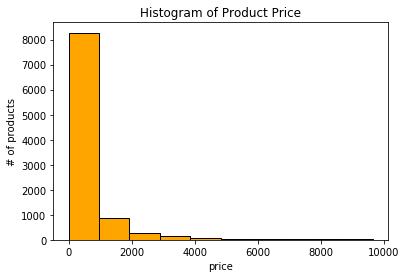

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(sorted(biz_ctr['imp_cnt'])[:-100], color = 'orange', edgecolor = 'black')

# Add labels
plt.title('Histogram of Product Price')
plt.xlabel('price')
plt.ylabel('# of products')

In [9]:
b_q1 = biz['price'].quantile(0.25)
b_q3 = biz['price'].quantile(0.75)
b_iqr = b_q3 - b_q1

In [16]:
b_nonoutliers = biz[(biz['price'] >= (b_q1 - 1.5*b_iqr)) & (biz['price'] <= (b_q3 + 1.5*b_iqr))]

In [17]:
b_nonoutliers.columns

Index(['id', 'uid', 'create_date', 'status', 'price', 'flag_used',
       'category_id', 'device', 'qty', 'image_count', 'bizlicense',
       'favorite_count', 'comment_count', 'review_count', 'grade', 'interest',
       'create_month'],
      dtype='object')

In [18]:
b_nonoutliers.groupby('create_month')['price'].mean()

create_month
2020-01    67866.597396
2020-02    63319.115001
2020-03    62367.307526
Name: price, dtype: float64

In [19]:
n_q1 = normal['price'].quantile(0.25)
n_q3 = normal['price'].quantile(0.75)
n_iqr = n_q3 - n_q1

In [20]:
n_nonoutliers = normal[(normal['price'] >= (n_q1 - 1.5*n_iqr)) & (normal['price'] <= (n_q3 + 1.5*n_iqr))]

In [21]:
n_nonoutliers.groupby('create_month')['price'].mean()

create_month
2020-01    36345.873732
2020-02    34836.783362
2020-03    34009.047128
Name: price, dtype: float64